#***Youtube Preprocessing***

In [1]:
!pip install youtube_transcript_api

19.46s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
  Using cached youtube_transcript_api-0.6.2-py3-none-any.whl.metadata (15 kB)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.6-py3-none-any.whl.metadata (9.9 kB)
  Using cached urllib3-2.2.0-py3-none-any.whl.metadata (6.4 kB)
Using cached youtube_transcript_api-0.6.2-py3-none-any.whl (24 kB)
Using cached requests-2.31.0-py3-none-any.whl (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 8.1 MB/s eta 0:00:00
Using cached idna-3.6-py3-none-any.whl (61 kB)
Using cached urllib3-2.2.0-py3-none-any.whl (120 kB)


In [2]:
from youtube_transcript_api import YouTubeTranscriptApi

In [3]:
from IPython.display import YouTubeVideo

In [4]:
video=input("Enter the link of your YouTube Video: ")

Enter the link of your YouTube Video:  https://www.youtube.com/watch?v=T-JVpKku5SI


In [5]:
id_video=video.split("=")[1]
print(id_video)

T-JVpKku5SI


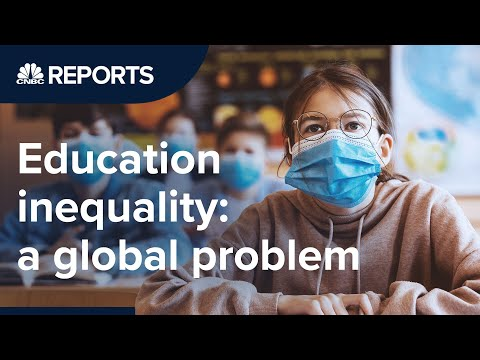

In [6]:
YouTubeVideo(id_video)

In [7]:
transcript = YouTubeTranscriptApi.get_transcript(id_video)

In [8]:
transcript

[{'text': 'Malcolm X once said that\n“Education is the passport to the future.”',
  'start': 0.099,
  'duration': 3.62},
 {'text': 'But what if some passports\nare better than others,',
  'start': 3.719,
  'duration': 2.481},
 {'text': 'giving the holder access\nto better schools and teachers',
  'start': 6.2,
  'duration': 2.39},
 {'text': 'and, in turn,\na more prosperous future?',
  'start': 8.59,
  'duration': 2.69},
 {'text': 'These inequalities have been around\nlong before Covid-19,',
  'start': 11.28,
  'duration': 2.32},
 {'text': 'and yet, the pandemic has both exacerbated them\nand made them more visible.',
  'start': 13.6,
  'duration': 4.48},
 {'text': 'While the standard of education\nvaries greatly globally,',
  'start': 22.5,
  'duration': 3.04},
 {'text': 'education inequality happens\nat the local level in all countries.',
  'start': 25.54,
  'duration': 3.94},
 {'text': 'For example, only four\nout of every 100 children in Africa',
  'start': 29.48,
  'duration': 3.4

In [9]:
doc = ""
for line in transcript:
    doc =doc+ ' ' + line['text']
print(type(doc))
print(doc)
#print(len(result))

<class 'str'>
 Malcolm X once said that
“Education is the passport to the future.” But what if some passports
are better than others, giving the holder access
to better schools and teachers and, in turn,
a more prosperous future? These inequalities have been around
long before Covid-19, and yet, the pandemic has both exacerbated them
and made them more visible. While the standard of education
varies greatly globally, education inequality happens
at the local level in all countries. For example, only four
out of every 100 children in Africa is expected to enter a graduate
and postgraduate institution, compared to 14 out of 100
in South and West Asia and 36 out of 100
in Latin America. Even in developed countries,
the quality of schooling can differ greatly, whether rich or poor. High national wealth then,
is no guarantee of high equality. The U.K., Germany and the U.S. are among the
richest countries in the world, but all three rank poorly on an educational inequality league table
of 41

In [10]:
doc=[]
for line in transcript:
  if "\n" in line['text']:
    x=line['text'].replace("\n"," ")
    doc.append(x)
  else:
    doc.append(line['text'])
print(doc)

['Malcolm X once said that “Education is the passport to the future.”', 'But what if some passports are better than others,', 'giving the holder access to better schools and teachers', 'and, in turn, a more prosperous future?', 'These inequalities have been around long before Covid-19,', 'and yet, the pandemic has both exacerbated them and made them more visible.', 'While the standard of education varies greatly globally,', 'education inequality happens at the local level in all countries.', 'For example, only four out of every 100 children in Africa', 'is expected to enter a graduate and postgraduate institution,', 'compared to 14 out of 100 in South and West Asia', 'and 36 out of 100 in Latin America.', 'Even in developed countries, the quality of schooling can differ greatly,', 'whether rich or poor.', 'High national wealth then, is no guarantee of high equality.', 'The U.K., Germany and the U.S. are among the richest countries in the world, but all three rank poorly', 'on an educat

In [11]:
paragraph=" ".join(doc)
print(paragraph)

Malcolm X once said that “Education is the passport to the future.” But what if some passports are better than others, giving the holder access to better schools and teachers and, in turn, a more prosperous future? These inequalities have been around long before Covid-19, and yet, the pandemic has both exacerbated them and made them more visible. While the standard of education varies greatly globally, education inequality happens at the local level in all countries. For example, only four out of every 100 children in Africa is expected to enter a graduate and postgraduate institution, compared to 14 out of 100 in South and West Asia and 36 out of 100 in Latin America. Even in developed countries, the quality of schooling can differ greatly, whether rich or poor. High national wealth then, is no guarantee of high equality. The U.K., Germany and the U.S. are among the richest countries in the world, but all three rank poorly on an educational inequality league table of 41 of the world’s

#***Extractive YouTube Summary***

##NLTK Summarization

In [14]:
!pip install nltk

291.92s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 785.1/785.1 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 11.2 MB/s eta 0:00:00


In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
mytext= paragraph

In [19]:
stops = set(stopwords.words('english'))
word_array = word_tokenize(mytext)

wordfreq=dict()
for word in word_array:
  word=word.lower()
  if word in stops:
    continue
  elif word in wordfreq:
    wordfreq[word]+=1
  else:
    wordfreq[word]=1

#word_array
#frequencytable


In [20]:
sent_array=sent_tokenize(mytext)

sentfreq=dict()
for sentence in sent_array:
  for word,freq in wordfreq.items():
    if word in sentence.lower():
      if sentence in sentfreq:
        sentfreq[sentence]+=freq
      else:
        sentfreq[sentence]=freq  

#sentfreq

In [21]:
averageval=0
for sentence in sentfreq:
  averageval+=sentfreq[sentence]

average=int(averageval/len(sentfreq))

In [22]:
summary=''
for sentence in sent_array:
  if(sentence in sentfreq) and (sentfreq[sentence]>(1.5*average)):
    summary=summary+" "+sentence
print(summary)

 The U.K., Germany and the U.S. are among the richest countries in the world, but all three rank poorly on an educational inequality league table of 41 of the world’s richest countries. Small progress has been made in helping some children almost beat the odds and overcome the barriers that face them but the systemic underlying factors of our education system still remain, which mean we’re not ever reaching the most persistently disadvantaged. We want an education system which develops skills and social and emotional competencies alongside academic attainment, we want teachers and leaders to be rewarded for serving the most disadvantaged students, we want to engage parents and communities from all backgrounds in the education system and we want to prepare young people for what comes after school.


##Spacy Summarization


In [31]:
!pip install spacy
!python3 -m spacy download en_core_web_sm
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

519.20s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
526.50s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 75.3 MB/s eta 0:00:0000:010:01m
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [32]:
stopwords=list(STOP_WORDS)
from string import punctuation
punctuation=punctuation+ '\n'
#punctuation

In [33]:
text=paragraph
space = spacy.load('en_core_web_sm')
doc= space(text)

In [34]:
word_frequencies={}
for word in doc:
  if word.text.lower() not in stopwords:
      if word.text.lower() not in punctuation:
          if word.text not in word_frequencies.keys():
              word_frequencies[word.text] = 1
          else:
              word_frequencies[word.text] += 1

In [35]:
max_frequency=max(word_frequencies.values())
for word in word_frequencies.keys():
  word_frequencies[word]=word_frequencies[word]/max_frequency

In [36]:
sentence_tokens= [sent for sent in doc.sents]
sentence_scores = {}
for sent in sentence_tokens:
  for word in sent:
      if word.text.lower() in word_frequencies.keys():
          if sent not in sentence_scores.keys():                            
            sentence_scores[sent]=word_frequencies[word.text.lower()]
          else:
            sentence_scores[sent]+=word_frequencies[word.text.lower()]
#sentence_scores  

In [46]:
percent=int(input("How much percentage of summary you want? "))
ratio=(int(percent)) / 100
#ratio

How much percentage of summary you want?  10


In [47]:
from heapq import nlargest
select_length=int(len(sentence_tokens)*ratio)
select_length
summary=nlargest(select_length, sentence_scores,key=sentence_scores.get)
summary

[We want an education system which develops skills and social and emotional competencies alongside academic attainment, we want teachers and leaders to be rewarded for serving the most disadvantaged students, we want to engage parents and communities from all backgrounds in the education system and we want to prepare young people for what comes after school.,
 In many countries, the debate on inequality in education is seen through the prism of private schools versus state schools.,
 In a 2019 report by the education coalition Fair Education Alliance, pupils from disadvantaged backgrounds in the U.K. lag their peers by more than 8 months in reading, writing and maths by age 11.,
 While the standard of education varies greatly globally, education inequality happens at the local level in all countries.,
 Many believe that private education is at the root of inequality and reduces the chances for those children who attend state schools.,
 Small progress has been made in helping some child

In [48]:
final_summary=[word.text for word in summary]
final_summary
summary=''.join(final_summary)
summary

'We want an education system which develops skills and social and emotional competencies alongside academic attainment, we want teachers and leaders to be rewarded for serving the most disadvantaged students, we want to engage parents and communities from all backgrounds in the education system and we want to prepare young people for what comes after school.In many countries, the debate on inequality in education is seen through the prism of private schools versus state schools.In a 2019 report by the education coalition Fair Education Alliance, pupils from disadvantaged backgrounds in the U.K. lag their peers by more than 8 months in reading, writing and maths by age 11.While the standard of education varies greatly globally, education inequality happens at the local level in all countries.Many believe that private education is at the root of inequality and reduces the chances for those children who attend state schools.Small progress has been made in helping some children almost beat

##Translation


In [40]:
!pip install deep-translator

573.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 7.3 MB/s eta 0:00:00


In [41]:
!pip install googletrans

580.92s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.2 MB/s eta 0:00:0000:01
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15715 sha256=d4b542ee5a4bada0f7e607fccf92802d9dac0090ffbe375715ef2a21c12f1089
  Stored in directory: /home/studio-lab-user/.cache/pip/wheels/a0/a7/f5/8029729ab74f860fab6614e312b0aa48b665d1057280bc2ef3
Successfully built 

In [42]:
import googletrans

In [43]:
from deep_translator import GoogleTranslator
from deep_translator import MicrosoftTranslator

In [49]:
print("CHECK OUT YOUR SOURCE LANGUAGE FROM BELOW:")
print(" ")
langdict=googletrans.LANGUAGES
for i in langdict :
    print(i+"-" +langdict[i])
srclang=input("ENTER LANGUAGE CODE: ")

CHECK OUT YOUR SOURCE LANGUAGE FROM BELOW:
 
af-afrikaans
sq-albanian
am-amharic
ar-arabic
hy-armenian
az-azerbaijani
eu-basque
be-belarusian
bn-bengali
bs-bosnian
bg-bulgarian
ca-catalan
ceb-cebuano
ny-chichewa
zh-cn-chinese (simplified)
zh-tw-chinese (traditional)
co-corsican
hr-croatian
cs-czech
da-danish
nl-dutch
en-english
eo-esperanto
et-estonian
tl-filipino
fi-finnish
fr-french
fy-frisian
gl-galician
ka-georgian
de-german
el-greek
gu-gujarati
ht-haitian creole
ha-hausa
haw-hawaiian
iw-hebrew
he-hebrew
hi-hindi
hmn-hmong
hu-hungarian
is-icelandic
ig-igbo
id-indonesian
ga-irish
it-italian
ja-japanese
jw-javanese
kn-kannada
kk-kazakh
km-khmer
ko-korean
ku-kurdish (kurmanji)
ky-kyrgyz
lo-lao
la-latin
lv-latvian
lt-lithuanian
lb-luxembourgish
mk-macedonian
mg-malagasy
ms-malay
ml-malayalam
mt-maltese
mi-maori
mr-marathi
mn-mongolian
my-myanmar (burmese)
ne-nepali
no-norwegian
or-odia
ps-pashto
fa-persian
pl-polish
pt-portuguese
pa-punjabi
ro-romanian
ru-russian
sm-samoan
gd-scots gae

ENTER LANGUAGE CODE:  mr


In [50]:
to_translate = summary
translated = GoogleTranslator(source='auto', target=srclang).translate(to_translate)
print("YOUR TRANSLATED SUMMARY IS GIVEN BELOW:")
print(" ")
print(translated)

YOUR TRANSLATED SUMMARY IS GIVEN BELOW:
 
आम्हाला शैक्षणिक प्राप्तीसोबत कौशल्ये आणि सामाजिक आणि भावनिक क्षमता विकसित करणारी शिक्षण प्रणाली हवी आहे, आम्हाला सर्वात वंचित विद्यार्थ्यांची सेवा केल्याबद्दल शिक्षक आणि नेत्यांना बक्षीस मिळावे अशी आमची इच्छा आहे, आम्हाला शिक्षण प्रणालीमध्ये सर्व पार्श्वभूमीतील पालक आणि समुदायांना सहभागी करून घ्यायचे आहे आणि आम्ही इच्छितो. शाळेनंतर जे घडते त्यासाठी तरुणांना तयार करा. अनेक देशांमध्ये, शिक्षणातील असमानतेवरील वादविवाद खाजगी शाळा विरुद्ध राज्य शाळांच्या प्रिझममधून दिसून येतो. एज्युकेशन कोलिशन फेअर एज्युकेशन अलायन्सच्या 2019 च्या अहवालात, यूकेमधील वंचित पार्श्वभूमीतील विद्यार्थी. वयाच्या 11 व्या वर्षी वाचन, लेखन आणि गणितामध्ये त्यांच्या समवयस्कांना 8 महिन्यांपेक्षा जास्त मागे टाका. जागतिक स्तरावर शिक्षणाचा दर्जा मोठ्या प्रमाणात बदलत असताना, सर्व देशांमध्ये शैक्षणिक असमानता स्थानिक पातळीवर दिसून येते. अनेकांचा असा विश्वास आहे की खाजगी शिक्षण असमानतेचे मूळ आहे आणि राज्याच्या शाळांमध्ये जाणाऱ्या मुलांची शक्यता कमी करते. काही मुलांना जवळजवळ अडचणींवर मा

##Text To Speech

In [51]:
!pip install gTTS

823.66s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [52]:
!pip install pyttsx3  

839.41s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [54]:
!pip install pygobject

888.65s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
  Using cached PyGObject-3.46.0.tar.gz (723 kB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [43 lines of output]
        Using cached setuptools-69.1.0-py3-none-any.whl.metadata (6.1 kB)
        Using cached wheel-0.42.0-py3-none-any.whl.metadata (2.2 kB)
        Using cached pycairo-1.26.0.tar.gz (346 kB)
        Installing build dependencies: started
        Installing build dependencies: finished with status 'done'
        Getting requirements to build wheel: started
        Getting requirements to build wheel: finished with status 'done'
        Installing backend dependencies: started
        Installing backend dependencies: finished with status 'done'
        Preparing metadata (pyproject.toml): started
        Preparing metadata (pyproject.toml): finis

In [38]:
import gtts 

In [39]:
print("Choose the below option:")
print(" ")
print("E for converting extracted summary to speech.\n" "T for converting translated summary to speech.\n" "B for converting both translated and extracted summary to speech.")
option=input("Enter your choice: ")

Choose the below option:
 
E for converting extracted summary to speech.
T for converting translated summary to speech.
B for converting both translated and extracted summary to speech.
Enter your choice: e


In [40]:
if option=='E' or option=='e':
  speechtext=summary
  speech1=gtts.gTTS(speechtext)
  name1=input("Enter name of Extracted Summary file: ")
  speech1.save(name1+".mp3")

elif option=='T' or option=='t':
  speechtext=translated
  speech1=gtts.gTTS(speechtext)
  name2=input("Enter name of Translated Summary file: ")
  speech1.save(name2+".mp3")

elif option=='B' or option=='b':
  speechtext1=summary
  speechtext2=translated
  speech1=gtts.gTTS(speechtext1)
  speech2=gtts.gTTS(speechtext2)
  name1=input("Enter name of Extracted Summary file: ")
  name2=input("Enter name of Translated Summary file: ")
  speech1.save(name1+".mp3")
  speech2.save(name2+".mp3")

else:
  print("Invalid Option")

Enter name of Extracted Summary file: file1


#***Abstractive Based Summary***

In [41]:
!pip install transformers

In [42]:
from transformers import pipeline

In [43]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


In [44]:
result=paragraph

In [45]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
Machine learning is a complex discipline but implementing machine learning models is far less daunting and difficult than it used to be. Thanks to machine learning Frameworks such as Google's TensorFlow that ease the process of acquiring data, training model, solving predictions and refining future results. Created by the Google brain team tensorflow is an open source library for numerical computation and large scale machine learning. Tensorflow bundles together a study of machine learning and deep learning models and algorithms and make them useful by way of common metaphor who will use machine learning and all of its products to improve the search engine the translation image captioning or the recommendations to give you a concrete example, Google users can experience a faster and more refined search with artificial intelligence. If the user types a keyword in the search bar Google provides a recommendation about what could be the next world not as a flow is being used by

Your max_length is set to 142, but you input_length is only 79. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=39)


Summarized text
 Tensorflow is a simple program that consists of a construction phase and then an execution phase . It has eager execution by default which makes things so much simpler and easier to code . So as you can see with either X You should our program has a strong to a few lines of code .
input text 
ee for yourself. What an incredible framework this is till then thank you and happy learning. I hope you have enjoyed listening to this video. Please be kind enough to like it and you can comment any of your doubts and queries and we will reply them at the earliest do look out for more videos in our playlist And subscribe to Edureka channel to learn more. Happy learning.
Summarized text
 Edureka is an incredible framework for learning. ee for yourself. I hope you have enjoyed listening to this video. Please be kind enough to like it and you can comment any of your doubts and queries and we will reply them at the earliest do look out for more videos in our playlist .


In [73]:
mysummary=" ".join(summarized_text)
print(mysummary)

 Machine learning is a complex discipline but implementing machine learning models is far less daunting and difficult than it used to be . Frameworks such as Google's TensorFlow that ease the process of acquiring data, training model, solving predictions and refining future results . Google users can experience a faster and more refined search with artificial intelligence .  Airbnb uses tensorflow to classify the images and detect objects at scale . GE Healthcare is training a neural network to identify specific anatomic during the brain MRI exam to help improve speed and reliability now PayPal is using it as a flow to stay at The Cutting Edge of fraud detection . China mobile is using tensorflows to improve their success rate of the network element cut overs Channel .  Tessa flow offers multiple level of abstractions, so you can choose the right one for your needs . Kira's API makes getting started with tensorflow and machine learning very very easy . Kira has already successfully sup